In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import pandas as pd
import healpy as hp
import time
import warnings
from pixell import reproject
from classy import Class
%matplotlib inline
import ST
import pysm3 

In [2]:
nside_0256 = 256

In [5]:
sky = pysm3.Sky(nside = nside_0256 , preset_strings=["d1"])

/Users/arefe/opt/anaconda3/lib/python3.8/site-packages/pysm3/utils/data.py:42: UserWarning: Retrieve data for pysm_2/dust_t_new.fits (if not cached already)
  warnings.warn(f"Retrieve data for {filename} (if not cached already)")
/Users/arefe/opt/anaconda3/lib/python3.8/site-packages/pysm3/utils/data.py:42: UserWarning: Retrieve data for pysm_2/dust_q_new.fits (if not cached already)
  warnings.warn(f"Retrieve data for {filename} (if not cached already)")
/Users/arefe/opt/anaconda3/lib/python3.8/site-packages/pysm3/utils/data.py:42: UserWarning: Retrieve data for pysm_2/dust_u_new.fits (if not cached already)
  warnings.warn(f"Retrieve data for {filename} (if not cached already)")
/Users/arefe/opt/anaconda3/lib/python3.8/site-packages/pysm3/utils/data.py:42: UserWarning: Retrieve data for pysm_2/dust_beta.fits (if not cached already)
  warnings.warn(f"Retrieve data for {filename} (if not cached already)")
/Users/arefe/opt/anaconda3/lib/python3.8/site-packages/pysm3/utils/data.py:42: Us

In [6]:
dust = sky.components[0]

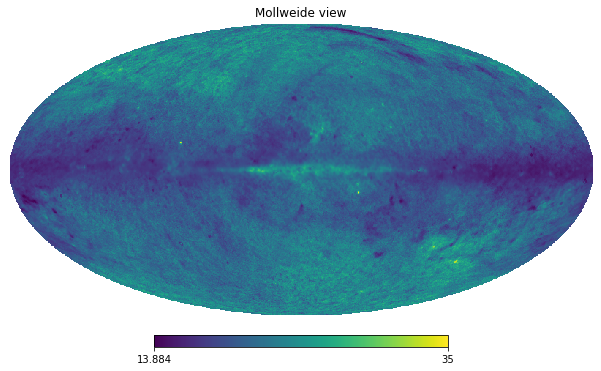

In [9]:
hp.mollview(dust.mbb_temperature)

In [10]:
map_sz = hp.read_map ("/Users/arefe/Projects/ScatteringTransform/maps/tsz.fits")

In [11]:
map_sz_0256 = hp.ud_grade (map_sz , nside_out=nside_0256)

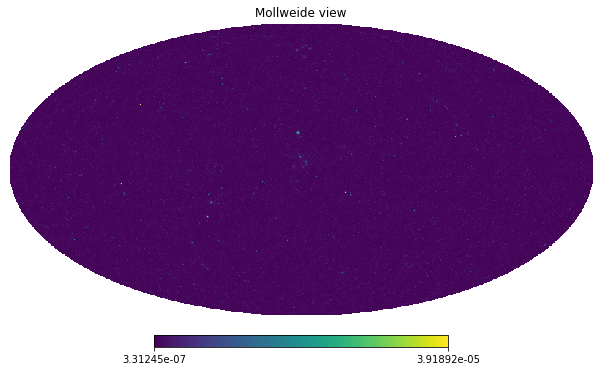

In [14]:
hp.mollview (map_sz_0256)

In [20]:
lmax_0256 = nside_0256 *3 -1
ell_0256 = np.arange (lmax_0256+1)
norm_0256 = ell_0256 * (ell_0256+1) / (2*np.pi)
#dl_sz_0256 = cl_sz_0256*norm_0256
ellsc_0256 = 360*60/ell_0256

<ipython-input-20-5371ac5333a6>:5: RuntimeWarning: divide by zero encountered in true_divide
  ellsc_0256 = 360*60/ell_0256


In [21]:
resol_0256 = hp.nside2resol(nside_0256 , arcmin = False )
resol_0256_arcmin = hp.nside2resol(nside_0256 , arcmin=True)

In [22]:
jmax = 10 
theta_bin = 10000

In [25]:
Jf=np.arange(jmax)
scale_0256=2**Jf*((2*resol_0256_arcmin)/0.75)

In [27]:
mor_l_0256 = ST.morlet_arr (resol_0256, jmax , lmax_0256, theta_bin)
gaus_l_0256 = ST.gaus_arr (resol_0256, jmax, lmax_0256, theta_bin)

/Users/arefe/opt/anaconda3/lib/python3.8/site-packages/healpy/sphtfunc.py:1242: ComplexWarning: Casting complex values to real discards the imaginary part
  window[0] = trapz(beam * p0 * st, theta)
/Users/arefe/opt/anaconda3/lib/python3.8/site-packages/healpy/sphtfunc.py:1243: ComplexWarning: Casting complex values to real discards the imaginary part
  window[1] = trapz(beam * p1 * st, theta)
/Users/arefe/opt/anaconda3/lib/python3.8/site-packages/healpy/sphtfunc.py:1247: ComplexWarning: Casting complex values to real discards the imaginary part
  window[l] = trapz(beam * p2 * st, theta)


In [30]:
%%time 
s1_sz_sim_0256 , i1_sz_sim_0256 = ST.compS1 (map_sz_0256 , mor_l_0256, jmax, nside_0256 )






0
1
2
3
4
5
6
7
8
9
CPU times: user 2.32 s, sys: 72.9 ms, total: 2.39 s
Wall time: 756 ms


In [32]:
%%time 
s2_sz_sim_0256 , i2_sz_sim_0256 = ST.compS2 ( i1_sz_sim_0256, mor_l_0256, jmax,  nside_0256 )

0
1
2
3
4
5
6
7
8
9
CPU times: user 23.2 s, sys: 499 ms, total: 23.7 s
Wall time: 6.34 s


Text(0, 0.5, 'S1')

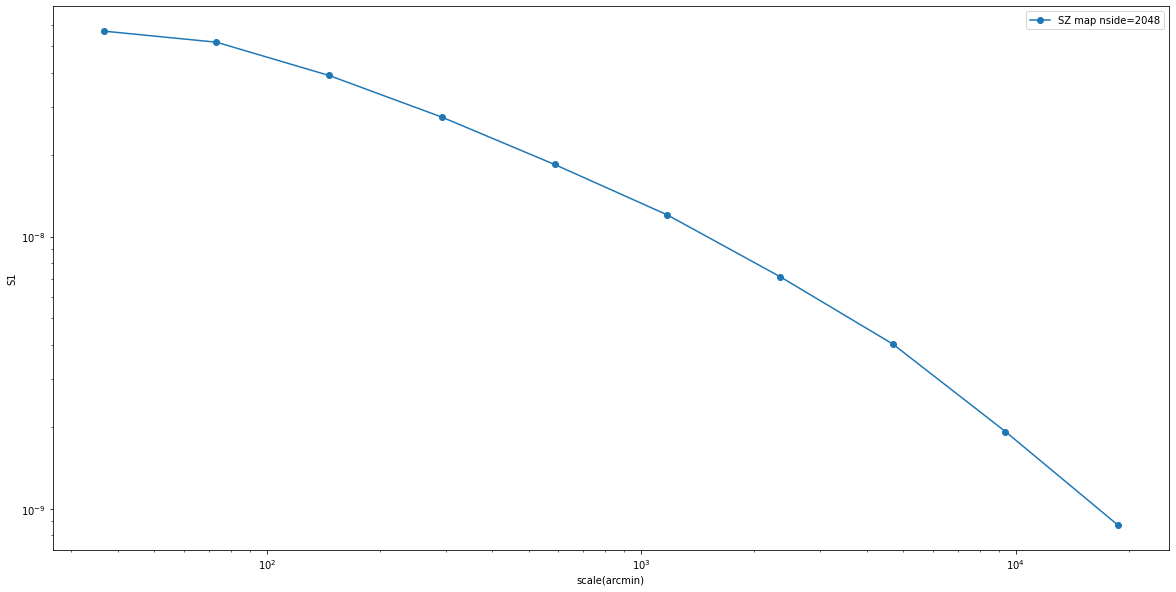

In [33]:
plt.figure(figsize=(20,10))
#plt.loglog (scale_2048,s1_sz,'o-' , linewidth = 4)
#plt.loglog (scale_2048,s1_sz_out,'o-' , linewidth = 4)
plt.loglog (scale_0256,s1_sz_sim_0256,'o-')
#plt.loglog (scale_0256,s1_sz_0256_out,'o-')
#plt.loglog(ellsc , dl_sz)
#plt.plot (scale,np.log(s1_sz_out_alm),'o-')
#plt.plot(ellsc,np.log(dl_sz))
plt.legend(["SZ map nside=2048", "Regenerated SZ map nside=2048" ,"SZ map nside=256", "Regenerated SZ map nside=256"])
plt.xlabel("scale(arcmin)")
plt.ylabel("S1")